# Análise descritiva de Dados Municipios da Paraíba

Este código tem como objetivo identificar as tendencias de comportamento e correlação entre as informações de pib, abertura e fechamento de empresas nos municipios paraibanos.  
Analisando principalmente os municipios de  **Picuí, Pedra Lavrada, São Vicente do Seridó, Baraúna e Nova Palmeira**, que estão sendo visados como possiveis locais para a construção de usinas eólicas.

-> **OBJETIVO PRINCIPAL:** Elaboração de pesquisa na região da Serra da Palmeira para identificar o mapa de oportunidades na região.

-> Municípios que possuem usinas eólica em operação entre [] está o ano de implementação da primeira usina eólica: 
- Junco do Seridó [2023]
- Mataraca [2007]
- Santa Luzia [2017]
- São José do Sabugi [2017] 


# Definição das Variáveis e Imports

In [211]:
import pandas as pd 
import numpy as np
import scipy as sp
import matplotlib as plt 
import seaborn as sns   


file = r"C:\Users\bianc\Desktop\AgentesDeDados\SantaLuzia\AnalisePython\dados\dados(in).csv"
file_geoloc = r"C:\Users\bianc\Desktop\AgentesDeDados\SantaLuzia\AnalisePython\dados\coordenadas_municipios_brasil.xls"
file_dtb = r"C:\Users\bianc\Desktop\AgentesDeDados\SantaLuzia\AnalisePython\dados\dtb_municipios (1).csv"
geojson_path = r'C:\Users\bianc\Desktop\AgentesDeDados\SantaLuzia\AnalisePython\dados\geojs-25-mun.json'

municipios_serra = {'Picuí': 2511400, 
                    'Pedra Lavrada':2511103, 
                    'São Vicente do Seridó':2515401, 
                    'Baraúna':2501534, 
                    'Nova Palmeira':2510303}

municipios_eolica = {'Junco do Seridó':2507804, 
                     'Mataraca':2509305, 
                     'Santa Luzia':2513406, 
                     'São José do Sabugi':2514701}



df_geoloc = pd.read_excel(file_geoloc, engine='xlrd'
                         ).rename(columns={'GEOCODIGO_MUNICIPIO':'CO_IBGE7'}
                         ).filter(['CO_IBGE7', 'LATITUDE', 'LONGITUDE'])

df_dtb = pd.read_csv(file_dtb, sep=';', encoding='latin1'
                    ).rename(columns={'cod_mundv':'CO_IBGE7'}
                    ).filter(['CO_IBGE7', 'nome_micro', 'nome_meso'])

df = pd.read_csv(file, sep=',')

df = df.assign(total_empresas=lambda x: (   x['empresas_geral'] + 
                                            x['empresas_hospedagem'] + 
                                            x['empresas_saude'] + 
                                            x['empresas_transporte'] + 
                                            x['empresas_alimenticio'] + 
                                            x['empresas_vestuario']),

                    PIB_bilhoes=lambda x: x['PIB']/1e9
                    ).merge( df_geoloc, on='CO_IBGE7', how='left'
                    ).merge(df_dtb, on='CO_IBGE7', how='left')

df_serra = df.query('CO_IBGE7 in @municipios_serra.values()')
df_eolica = df.query('CO_IBGE7 in @municipios_eolica.values()')




In [212]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4460 entries, 0 to 4459
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CO_IBGE7              4460 non-null   int64  
 1   MUNICIPIO             4460 non-null   object 
 2   ANO                   4460 non-null   int64  
 3   PIB                   4460 non-null   int64  
 4   POPULACAO_ESTIMADA    4014 non-null   float64
 5   PIB_PERCAPTA          4014 non-null   float64
 6   empresas_geral        4327 non-null   float64
 7   empresas_hospedagem   4327 non-null   float64
 8   empresas_saude        4327 non-null   float64
 9   empresas_transporte   4327 non-null   float64
 10  empresas_alimenticio  4327 non-null   float64
 11  empresas_vestuario    4327 non-null   float64
 12  total_empresas        4327 non-null   float64
 13  PIB_bilhoes           4460 non-null   float64
 14  LATITUDE              4460 non-null   float64
 15  LONGITUDE            

In [213]:
df.columns

Index(['CO_IBGE7', 'MUNICIPIO', 'ANO', 'PIB', 'POPULACAO_ESTIMADA',
       'PIB_PERCAPTA', 'empresas_geral', 'empresas_hospedagem',
       'empresas_saude', 'empresas_transporte', 'empresas_alimenticio',
       'empresas_vestuario', 'total_empresas', 'PIB_bilhoes', 'LATITUDE',
       'LONGITUDE', 'nome_micro', 'nome_meso'],
      dtype='object')

In [214]:
df.describe()

,CO_IBGE7,ANO,PIB,POPULACAO_ESTIMADA,PIB_PERCAPTA,empresas_geral,empresas_hospedagem,empresas_saude,empresas_transporte,empresas_alimenticio,empresas_vestuario,total_empresas,PIB_bilhoes,LATITUDE,LONGITUDE
count,4.460000e+03,4460.000000,4.460000e+03,4014.000000,4014.000000,4327.000000,4327.000000,4327.000000,4327.00000,4327.000000,4327.000000,4327.000000,4460.000000,4460.000000,4460.000000
mean,2.508704e+06,2011.500000,1.865173e+08,17162.255107,7121.753819,282.417379,1.475387,8.486018,7.78715,20.645713,5.688237,326.499884,0.186517,-7.063472,-36.644336
std,5.059185e+03,5.766928,1.077328e+09,57109.112425,5825.840695,1888.254964,8.247741,75.417879,43.67257,152.046941,35.531622,2196.939963,1.077328,0.390655,1.149174
min,2.500106e+06,2002.000000,3.506000e+06,1050.000000,1447.593528,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.003506,-8.157119,-38.678303
25%,2.504157e+06,2006.750000,2.152450e+07,4367.500000,3638.186754,19.000000,0.000000,0.000000,0.00000,1.000000,0.000000,21.000000,0.021524,-7.330932,-37.722721
50%,2.509008e+06,2011.500000,4.094000e+07,7176.000000,6583.182309,50.000000,0.000000,0.000000,0.00000,3.000000,0.000000,55.000000,0.040940,-7.065368,-36.486276
75%,2.513208e+06,2016.250000,8.487475e+07,14742.000000,9099.141818,133.000000,1.000000,2.000000,3.00000,9.000000,2.000000,149.500000,0.084875,-6.769855,-35.628161
max,2.517407e+06,2021.000000,2.224428e+10,825796.000000,171143.971810,61263.000000,198.000000,2537.000000,1323.00000,5336.000000,905.000000,71562.000000,22.244284,-6.188575,-34.813930


In [215]:
df['ANO'].unique()

array([2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
       2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021])

In [216]:
ocorrencias_por_cidade = df['CO_IBGE7'].value_counts()
cidades_com_menos_de_20 = ocorrencias_por_cidade[ocorrencias_por_cidade < 20]
print(cidades_com_menos_de_20)

Series([], Name: count, dtype: int64)


In [217]:
nan_count = df.isna().sum()
nan_percentage = (df.isna().mean() * 100).round(2)
nan_summary = pd.DataFrame({
    'Total de registros': df.shape[0],
    'Quantidade de NaN': nan_count,
    'Porcentagem de NaN (%)': nan_percentage
})
nan_summary


,Total de registros,Quantidade de NaN,Porcentagem de NaN (%)
CO_IBGE7,4460,0,0.00
MUNICIPIO,4460,0,0.00
ANO,4460,0,0.00
PIB,4460,0,0.00
POPULACAO_ESTIMADA,4460,446,10.00
PIB_PERCAPTA,4460,446,10.00
empresas_geral,4460,133,2.98
empresas_hospedagem,4460,133,2.98
empresas_saude,4460,133,2.98
empresas_transporte,4460,133,2.98


## MAPA


In [218]:
import folium
import json

# Criar o mapa centralizado na Paraíba
mapa = folium.Map(location=[-7.1214, -36.7242], zoom_start=8)

# Caminho para o arquivo GeoJSON
geojson_path = r'C:\Users\bianc\Desktop\AgentesDeDados\SantaLuzia\AnalisePython\dados\geojs-25-mun.json'

# Ler o arquivo GeoJSON com a codificação correta
with open(geojson_path, encoding='utf-8') as f:
    geojson_data = json.load(f)

# Lista das cidades específicas que você quer colorir
cidades_especificas = municipios_eolica.keys()

# Função de estilo que colore as cidades específicas de uma cor diferente
def estilo_cidades(feature):
    municipio = feature['properties']['name']  # Ajuste essa chave conforme o seu arquivo GeoJSON
    if municipio in cidades_especificas:
        return {
            'fillColor': '#4BA64E',  # Cor para as cidades específicas
            'color': 'black',
            'weight': 1,
            'fillOpacity': 1.0
        }
    elif municipio in municipios_serra.keys():
        return {
            'fillColor': '#E62E7F',  # Cor padrão para as outras cidades
            'color': 'black',
            'weight': 1,
            'fillOpacity': 1.0
        }
    else:
        return {
            'fillColor': '#3C3437',  # Cor padrão para as outras cidades
            'color': 'black',
            'weight': 1,
            'fillOpacity': 0.5
        }

# Adicionar a camada GeoJSON estilizada
folium.GeoJson(
    geojson_data,
    name='municipios',
    style_function=estilo_cidades
).add_to(mapa)

# Adicionar o controle de camadas
folium.LayerControl().add_to(mapa)

mapa

## Aplicação de Teste de Correlação

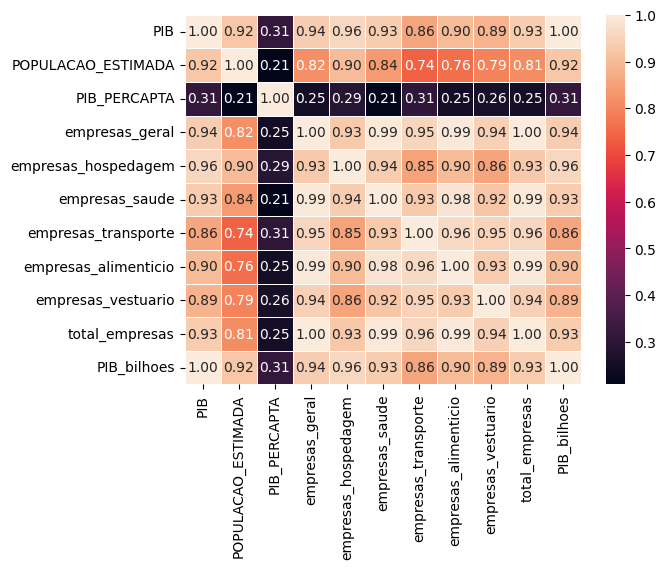

In [219]:
# Retirando valores NaN e aplicando correlação
correlacao = df.copy().drop(columns=['CO_IBGE7', 'ANO', 
                                     'MUNICIPIO', 'nome_micro', 
                                     'nome_meso', 'LATITUDE', 
                                     'LONGITUDE']).dropna().corr()

sns.heatmap(correlacao, annot = True, fmt=".2f", linewidths=.6)
correlacao.to_csv(r"C:\Users\bianc\Desktop\AgentesDeDados\SantaLuzia\AnalisePython\dados\correlacao.csv", sep=';', index=False)

# Análise do PIB 

Nesta seção, realizaremos a análise da variável PIB nos municípios paraibanos, começando com uma visão geral. Em seguida, concentraremos nossa análise nos municípios que possuem usinas eólicas, a saber: Junco do Seridó, Mataraca, Santa Luzia e São José do Sabugi. Por fim, focaremos na análise dos municípios da Serra da Palmeira, incluindo Picuí, Pedra Lavrada, São Vicente do Seridó, Baraúna e Nova Palmeira.

A seguir, apresentamos os 10 municípios com a maior média de PIB entre 2002 e 2021. João Pessoa ocupa a primeira posição, com uma média de 13,033 bilhões e uma taxa média de variação de 8,82% ao ano. Em segundo lugar está Campina Grande, com uma média de 5,935 bilhões e uma taxa de variação de 9,33% ao ano. Cabedelo figura em terceiro lugar, com uma média de 1,777 bilhões e uma taxa média de variação de 10,96% ao ano.

Observa-se que metade desses municípios está situada na mesorregião da Mata Paraibana. As demais cidades estão distribuídas entre o Agreste (Campina Grande em 2º lugar e Guarabira em 10º lugar) e o Sertão Paraibano (Patos em 5º lugar, Sousa em 8º lugar e Cajazeiras em 9º lugar).

In [235]:
pib_df = df.copy()
pib_df['taxa_variacao'] = pib_df.groupby('MUNICIPIO')['PIB'].pct_change() * 100
pib_df = pib_df.fillna(0
                        ).groupby(['MUNICIPIO', 'nome_meso']
                        ).agg(  pib_medio_bilhoes = ('PIB_bilhoes', 'mean'),
                                pib_max_bilhoes =('PIB_bilhoes', 'max'), 
                                pib_min_bilhoes =('PIB_bilhoes', 'min'),
                                taxa_variacao = ('taxa_variacao', 'mean'),
                                variancia = ('PIB', 'var')
                               
                        ).reset_index(     
                        ).sort_values(by='pib_medio_bilhoes', ascending=False
                        )

pib_df = pib_df.head(10)
pib_df

,MUNICIPIO,nome_meso,pib_medio_bilhoes,pib_max_bilhoes,pib_min_bilhoes,taxa_variacao,variancia
93,João Pessoa - PB,Mata Paraibana,13.033007,22.244284,4.152310,8.923654,4.040224e+19
48,Campina Grande - PB,Agreste Paraibano,5.935045,10.373107,1.783544,9.335495,8.341965e+18
38,Cabedelo - PB,Mata Paraibana,1.777005,3.152546,0.427129,10.966233,8.250941e+17
169,Santa Rita - PB,Mata Paraibana,1.552275,2.616825,0.496068,8.897758,5.822912e+17
133,Patos - PB,Sertão Paraibano,1.068878,1.993586,0.283178,10.421653,3.488262e+17
22,Bayeux - PB,Mata Paraibana,0.876099,1.388145,0.327619,7.637308,1.407875e+17
6,Alhandra - PB,Mata Paraibana,0.769904,3.399775,0.110154,20.005108,7.895865e+17
185,Sousa - PB,Sertão Paraibano,0.713532,1.318529,0.202875,9.947260,1.413478e+17
44,Cajazeiras - PB,Sertão Paraibano,0.688686,1.231740,0.177049,10.433589,1.265919e+17
79,Guarabira - PB,Agreste Paraibano,0.647779,1.790168,0.159840,13.675377,1.672369e+17


Como podemos ver no gráfico abaixo João Pessoa lidera as cidades paraibanas e apresenta maior crescimento durantes os últimos anos, e logo em seguida temos Campina Grande, e depois Cabedelo com menor expressividade.

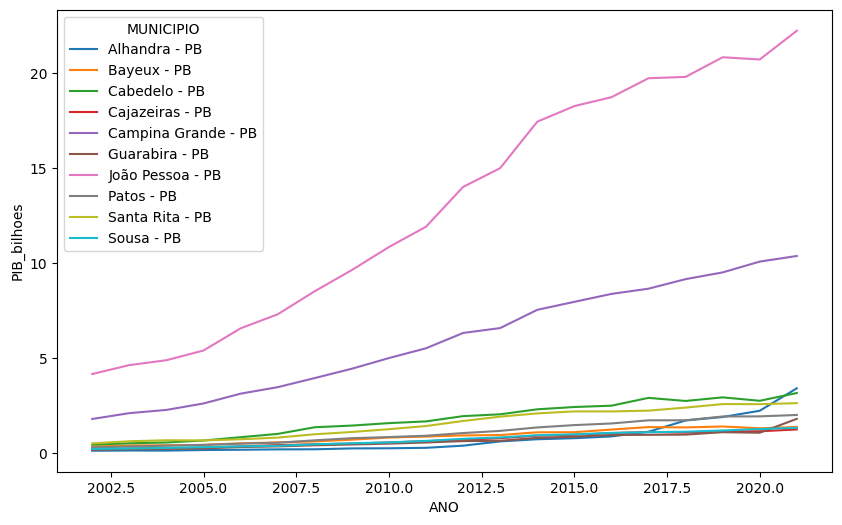

In [221]:
variaveis = pib_df['MUNICIPIO']
df_filter = df.copy().query('MUNICIPIO in @variaveis')
ax = sns.lineplot(data=df_filter, x='ANO', y='PIB_bilhoes', hue='MUNICIPIO',palette='tab10')
ax.figure.set_size_inches(10, 6)


Entre os municípios com usinas eólicas, Mataraca, localizado na Mata Paraibana, destaca-se com a maior média de PIB entre 2002 e 2021, apresentando um PIB médio de 143,334 milhões e uma taxa média de variação de 8,05% ao ano. Em seguida, estão Santa Luzia, com um PIB médio de 133,117 milhões e uma taxa de variação anual de 12,9%, e Junco do Seridó, que possui um PIB médio de 44,832 milhões e uma taxa média de variação de 10,82% ao ano.

In [234]:
pib_eolica = df_eolica.copy()
pib_eolica['taxa_variacao'] = pib_eolica.groupby('MUNICIPIO')['PIB'].pct_change() * 100
pib_eolica = pib_eolica.fillna(0
                        ).groupby(['MUNICIPIO', 'nome_meso']
                        ).agg(  pib = ('PIB', 'mean'),
                                pib_medio_bilhoes = ('PIB_bilhoes', 'mean'),
                                pib_max_bilhoes =('PIB_bilhoes', 'max'), 
                                pib_min_bilhoes =('PIB_bilhoes', 'min'),
                                taxa_variacao = ('taxa_variacao', 'mean'),
                                variancia = ('PIB', 'var'),
                               
                        ).reset_index(     
                        ).sort_values(by='pib_medio_bilhoes', ascending=False
                        )
pib_eolica


,MUNICIPIO,nome_meso,pib,pib_medio_bilhoes,pib_max_bilhoes,pib_min_bilhoes,taxa_variacao,variancia
1,Mataraca - PB,Mata Paraibana,143334050.0,0.143334,0.240531,0.059712,8.057811,4.758093e+15
2,Santa Luzia - PB,Borborema,133117150.0,0.133117,0.372292,0.033923,12.957664,8.477544e+15
0,Junco do Seridó - PB,Borborema,44832150.0,0.044832,0.096602,0.012931,10.823298,6.235752e+14
3,São José do Sabugi - PB,Borborema,40404450.0,0.040404,0.125142,0.008106,16.379741,1.412957e+15


Já nos municipios com usinas eólicas percebemos uma tendência semelhante aos demais municípios paraibanos, porém com destque ao município de Santa Luzia, que apesar de apresentar um PIB Médio abaixo de Mataraca, se destaca apresentando maior crescimento ao longo dos anos, e trazendo o maior pib max do conjunto. 
Podemos perceber que todos os municípios seguem uma tendência de crescimento.

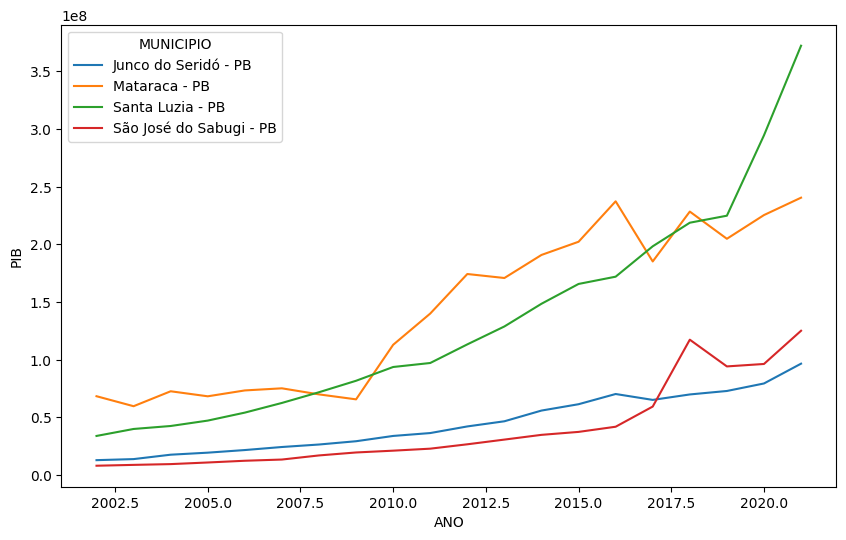

In [223]:
ax = sns.lineplot(data=df_eolica, x='ANO', y='PIB', hue='MUNICIPIO')
ax.figure.set_size_inches(10, 6)


Analisando mais a fundo as variações no pib podemos fazer algumas observações:
- Santa Luzia apresenta uma variação positiva consistente ao longo dos anos, com taxas expressivas em anos como 2012 (16,6%) e 2021 (26,4%).

- São José do Sabugi também mostra uma variação de PIB bastante elevada, especialmente em 2017 (41,7%) e 2018 (97,6%). Esse crescimento abrupto pode estar relacionado a investimentos significativos ou ao impacto das usinas eólicas na região.

- Mataraca exibe variações mais voláteis, com anos de crescimento negativo, como 2003 (-12,7%) e 2017 (-22%). Apesar de grandes variações negativas, também há picos de crescimento, como em 2010 (72,1%). Essa volatilidade pode indicar uma economia mais instável ou dependente de fatores externos específicos.

- Junco do Seridó mostra uma variação moderada, sem grandes picos ou quedas extremas. O crescimento é constante, com anos de destaque como 2014 (19,9%) e 2021 (21,6%). Esse padrão pode indicar uma economia mais estável, com crescimento sustentado ao longo do tempo.


In [224]:
df_temp_eolica = df_eolica.copy()
df_temp_eolica['taxa_variacao'] = df_temp_eolica.groupby('MUNICIPIO')['PIB'].pct_change() * 100
df_temp_eolica = df_temp_eolica.fillna(0)
df_pivot = df_temp_eolica.pivot_table(index='MUNICIPIO', columns='ANO', values='taxa_variacao')
df_pivot


ANO,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
MUNICIPIO,,,,,,,,,,,,,,,,,,,,
Junco do Seridó - PB,0.0,7.106952,27.552347,9.985282,11.662378,12.186578,8.849630,10.768476,15.619995,7.373788,15.752203,10.608935,19.918107,9.832490,14.414766,-7.263881,7.239173,4.308643,8.926465,21.623629
Mataraca - PB,0.0,-12.669835,21.692457,-6.001514,7.447587,2.496219,-6.996530,-6.154946,72.068724,23.979818,24.475939,-1.984043,11.699886,5.992927,17.333452,-21.966703,23.339290,-10.322581,10.036313,6.689761
Santa Luzia - PB,0.0,17.840403,6.449031,11.007450,14.649533,15.488303,14.853306,13.831698,14.604200,3.700661,16.610243,13.715662,15.272454,11.561997,3.802151,15.314231,10.309679,2.781764,30.984193,26.376320
São José do Sabugi - PB,0.0,9.005675,7.616569,14.722894,13.777615,8.499839,26.442415,15.098661,7.954487,8.200208,16.559647,15.301304,13.342217,7.358339,11.955767,41.730687,97.623096,-19.743948,2.243709,29.905640


Já nos munícipios da serra da palmeira podemos observar:
Picuí lidera entre os cinco municípios, com um PIB médio de aproximadamente R$ 117,45 milhões (ou 0,117 bilhões), o que indica que Picuí é o município mais relevante economicamente entre os listados.
Pedra Lavrada e São Vicente do Seridó vêm em seguida, com PIBs médios de aproximadamente R$ 47,73 milhões (0,047 bilhões) e R$ 45,45 milhões (0,045 bilhões), respectivamente.
Baraúna e Nova Palmeira possuem PIBs médios mais baixos, em torno de R$ 26 milhões (0,026 bilhões) cada.

In [232]:
pib_serra = df_serra.copy()
pib_serra['taxa_variacao'] = pib_serra.groupby('MUNICIPIO')['PIB'].pct_change() * 100
pib_serra = pib_serra.fillna(0
                        ).groupby(['MUNICIPIO', 'nome_meso']
                        ).agg(  pib = ('PIB', 'mean'),
                                pib_medio_bilhoes = ('PIB_bilhoes', 'mean'),
                                pib_max_bilhoes =('PIB_bilhoes', 'max'), 
                                pib_min_bilhoes =('PIB_bilhoes', 'min'),
                                taxa_variacao = ('taxa_variacao', 'mean'),
                                variancia = ('PIB', 'var')
                               
                        ).reset_index(     
                        ).sort_values(by='pib_medio_bilhoes', ascending=False
                        )
pib_serra

,MUNICIPIO,nome_meso,pib,pib_medio_bilhoes,pib_max_bilhoes,pib_min_bilhoes,taxa_variacao,variancia
3,Picuí - PB,Borborema,117452400.0,0.117452,0.213192,0.039817,8.893086,3.347277e+15
2,Pedra Lavrada - PB,Borborema,47726400.0,0.047726,0.080075,0.013792,9.464421,5.318049e+14
4,São Vicente do Seridó - PB,Borborema,45454150.0,0.045454,0.089888,0.013707,10.082662,5.727117e+14
0,Baraúna - PB,Borborema,26462550.0,0.026463,0.049784,0.008048,9.804805,1.836209e+14
1,Nova Palmeira - PB,Borborema,26009700.0,0.026010,0.048983,0.007695,9.866565,1.842624e+14


A variância indica a dispersão dos valores do PIB em torno da média ao longo do período analisado. Os municípios São Vicente do Seridó e Pedra Lavrada possuem variâncias consideráveis (em torno de 5,7e+14 e 5,3e+14, respectivamente), o que pode refletir maior volatilidade nas suas economias.
Picuí apresenta a maior variância (3,3e+15), sugerindo que, apesar de seu PIB médio mais alto, a economia local foi mais sujeita a oscilações.
Baraúna e Nova Palmeira têm as menores variâncias, indicando uma economia com menos volatilidade em comparação aos outros municípios. Podemos verificar isso analisando o gráfico:

<Axes: xlabel='ANO', ylabel='PIB'>

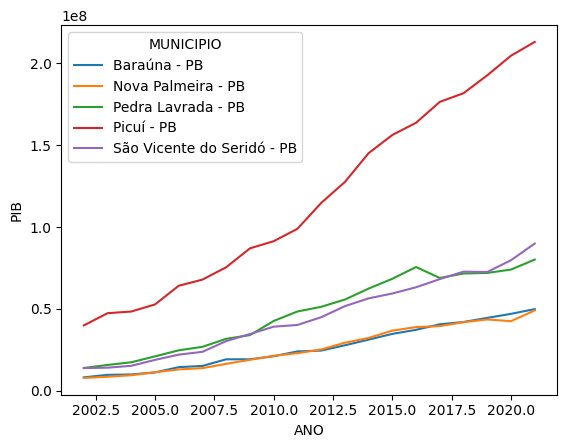

In [226]:
sns.lineplot(data=df_serra, x='ANO', y='PIB', hue='MUNICIPIO')

Através da tabela a seguir, analisando com mais cuidado as taxas de variação no pib, podemos fazer algumas observações:
- São Vicente do Seridó - PB e Pedra Lavrada - PB mostram maiores flutuações na variação do PIB, o que pode sugerir uma maior vulnerabilidade a fatores externos, como mudanças econômicas regionais ou setoriais.
- Baraúna - PB e Picuí - PB têm flutuações menores, sugerindo uma economia mais estável, embora com taxas de crescimento mais moderadas.

In [233]:
df_temp_serra = df_serra.copy()
df_temp_serra['taxa_variacao'] = df_temp_serra.groupby('MUNICIPIO')['PIB'].pct_change() * 100
df_temp_serra = df_temp_serra.fillna(0)
df_pivot = df_temp_serra.pivot_table(index='MUNICIPIO', columns='ANO', values='taxa_variacao')
df_pivot

ANO,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
MUNICIPIO,,,,,,,,,,,,,,,,,,,,
Baraúna - PB,0.0,18.911531,2.601881,12.679499,29.094360,5.243996,27.002395,0.005238,9.653258,14.248866,2.086295,13.216202,12.603097,11.224621,7.200624,9.128385,3.456534,5.982865,5.546048,6.210398
Nova Palmeira - PB,0.0,9.317739,11.174513,19.150984,15.669030,6.168050,19.219526,15.036165,13.161400,7.458681,9.868104,16.511786,10.077705,13.857014,5.935050,1.621719,6.010402,3.984779,-2.398214,15.506874
Pedra Lavrada - PB,0.0,13.246810,10.583264,20.906670,17.674664,8.789778,18.212763,7.195519,25.536500,13.616911,5.929345,8.660910,12.071849,9.624424,10.526855,-8.867497,3.978148,0.475099,2.877448,8.248956
Picuí - PB,0.0,18.750785,2.163568,8.980251,21.717575,5.853895,11.162057,15.314527,5.030709,8.296102,15.974357,11.195878,13.823656,7.660938,4.779699,7.801241,2.997207,6.024023,6.225392,4.109857
São Vicente do Seridó - PB,0.0,1.831181,8.217510,23.992056,17.064446,7.899658,27.712728,14.318340,13.037436,2.656114,11.811672,15.122844,9.228533,5.291832,6.433182,7.897070,6.690932,-0.299879,9.954745,12.792843
